In [1]:
require(dplyr)
require(reshape2)
require(ggplot2)
require(GGally)

Loading required package: dplyr

Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union

Loading required package: reshape2
Loading required package: ggplot2
Loading required package: GGally

Attaching package: ‘GGally’

The following object is masked from ‘package:dplyr’:

    nasa



In [2]:
texas.rw <- data.frame(graph='texas', method='rw', 
                       read.csv('sampled/roads_texas_rw.csv', header = T))
texas.ff <- data.frame(graph='texas', method='ff', 
                       read.csv('sampled/roads_texas_ff.csv', header = T))
facebook.rw <- data.frame(graph='facebook', method='rw', 
                          read.csv('sampled/facebook_rw.csv', header = T))
facebook.ff <- data.frame(graph='facebook', method='ff', 
                          read.csv('sampled/facebook_ff.csv', header = T))

In [3]:
data <- rbind(texas.rw, texas.ff, facebook.rw, facebook.ff)
str(data)

'data.frame':	400 obs. of  10 variables:
 $ graph                        : Factor w/ 2 levels "texas","facebook": 1 1 1 1 1 1 1 1 1 1 ...
 $ method                       : Factor w/ 2 levels "rw","ff": 1 1 1 1 1 1 1 1 1 1 ...
 $ edges                        : int  1304 1171 1289 1211 1334 1265 1186 1231 1233 1307 ...
 $ triangles                    : int  34 37 56 33 48 55 49 40 33 87 ...
 $ mean_triangles               : num  0.102 0.111 0.168 0.099 0.144 0.165 0.147 0.12 0.099 0.261 ...
 $ density                      : num  0.00261 0.00234 0.00258 0.00242 0.00267 ...
 $ mean_degree                  : num  2.61 2.34 2.58 2.42 2.67 ...
 $ components                   : int  1 1 1 1 1 1 1 1 1 1 ...
 $ mean_component_size          : num  1000 1000 1000 1000 1000 1000 1000 1000 1000 1000 ...
 $ global_clustering_coefficient: num  0.0404 0.055 0.0673 0.046 0.0544 ...


In [4]:
analyzed.data.ok <- data %>% 
    select(graph, method, density, global_clustering_coefficient) %>%
    melt(id.vars = c('graph', 'method'))

ground.truth.ok <- data.frame(graph = c('facebook', 'texas'),
                              density = c(0.0004023, 0.0000002),
                              global_clustering_coefficient = c(0.1477, 0.0602)) %>%
    melt(id.vars = c('graph'))

plot.ok <- ggplot(analyzed.data.ok, aes(x=method, y=value)) + 
    facet_wrap(~variable, scales='free_y') + 
    geom_jitter(aes(color = graph), alpha=0.5) + 
    geom_hline(data = ground.truth.ok, aes(yintercept = value, color = graph))

In [5]:
analyzed.data.off <- data %>% 
    select(graph, method, mean_triangles, components, mean_degree) %>%
    melt(id.vars = c('graph', 'method'))

ground.truth.off <- data.frame(graph = c('facebook', 'texas'),
                           #edges = c(817035, 1921660),
                           #triangles = c(3500542, 82869),
                           mean_triangles = c(164.780, 0.178),
                           mean_degree = c(25.640, 2.758),
                           #density = c(0.0004023, 0.0000002),
                           components = c(144, 13890)) %>%
                           #mean_component_size = c(442.576, 100.315),
                           #global_clustering_coefficient = c(0.1477, 0.0602)
                           #     ) %>%
    melt(id.vars = c('graph'))

plot.off <- ggplot(analyzed.data.off, aes(x=method, y=log(value))) + 
    facet_wrap(~variable, scales='free_y') + 
    geom_jitter(aes(color = graph), alpha=0.5) + 
    geom_hline(data = ground.truth.off, aes(yintercept = log(value), color = graph))

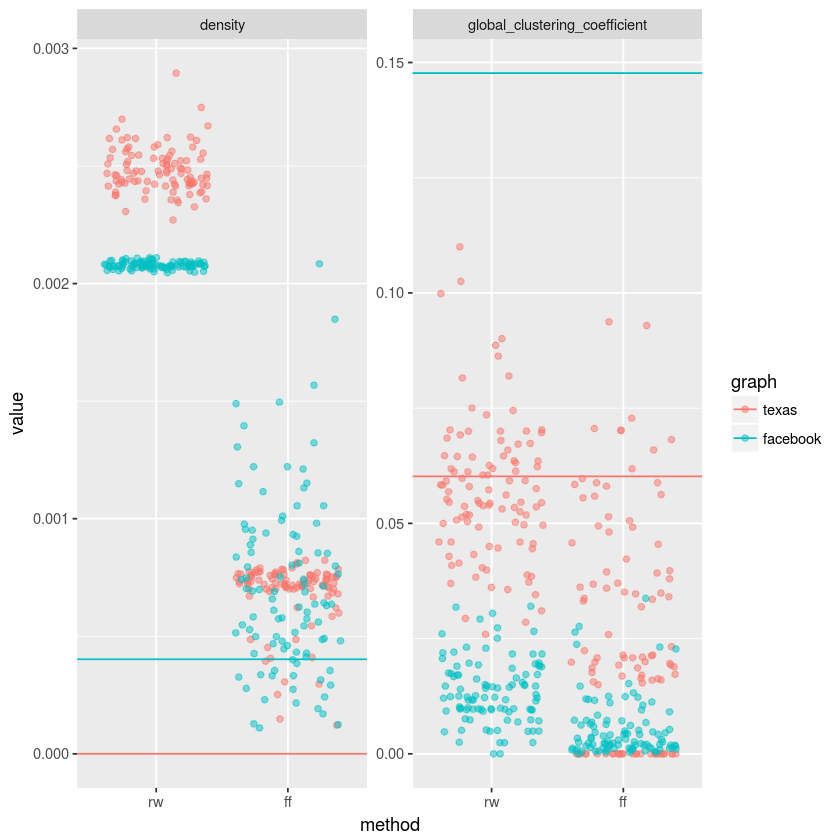

In [7]:
plot.ok

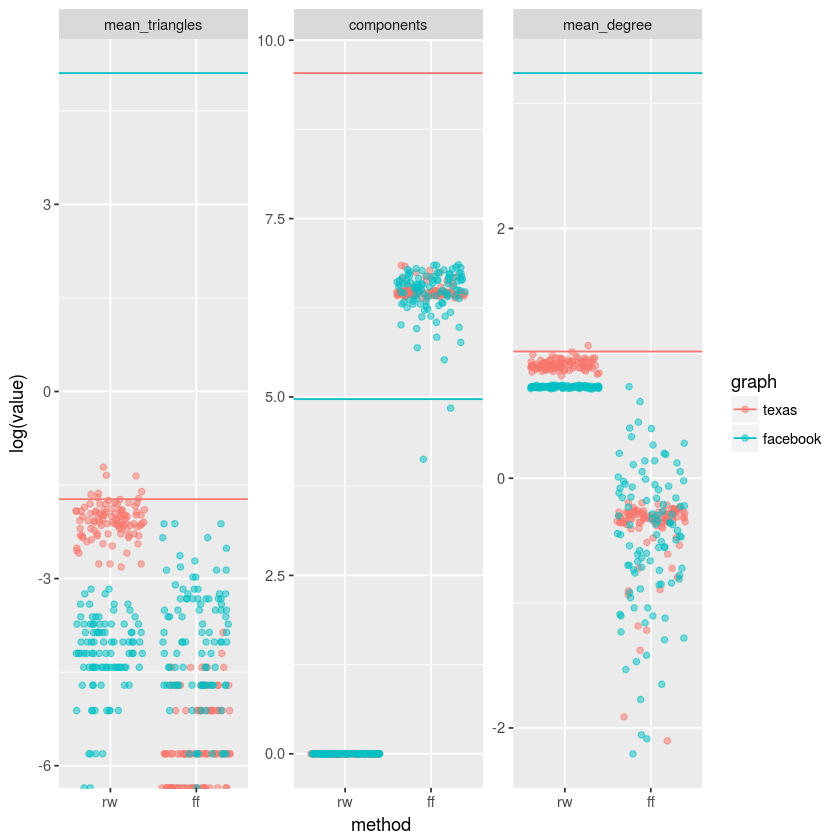

In [8]:
plot.off